In [1]:
from molmap import loadmap
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, log_loss
import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm


warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [2]:
def CalcFeatImp(model, mp, arrX, dfY, task_type = 'classification', sigmoidy = False):
    '''
    Forward prop. Feature importance
    '''
    
    if task_type == 'classification':
        f = log_loss
    else:
        f = mean_squared_error
        
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    grid = mp.plot_grid()
    Y_true = dfY.values
    df_grid = mp.df_grid.sort_values(['y', 'x']).reset_index(drop=True)
    Y_prob = model.predict(arrX)
    N, W, H, C = arrX.shape
    
    if (sigmoidy) & (task_type == 'classification'):
        Y_prob = sigmoid(Y_prob)

    final_res = {}
    for k, col in enumerate(dfY.columns):
        print('calculating feature importance for %s ...' % col)
        
        results = []
        loss = f(Y_true[:, k].tolist(), Y_prob[:, k].tolist())
        for i in tqdm(range(len(df_grid)), ascii= True):
            ts = df_grid.iloc[i]
            y = ts.y
            x = ts.x
            X1 = copy(arrX)
            X1[:, y, x,:] = np.full(X1[:, y, x,:].shape, fill_value = arrX.min())
            #Y1 = model.predict(X1)
            Y_pred_prob = model.predict(X1)
            if (sigmoidy) & (task_type == 'classification'):
                Y_pred_prob = sigmoid(Y_pred_prob)
            mut_loss = f(Y_true[:, k].tolist(), Y_pred_prob[:, k].tolist()) 
            res =  mut_loss - loss # if res > 0, important, othervise, not important
            results.append(res)
            
        final_res.update({col:results})
    df = pd.DataFrame(final_res)
    df.columns = df.columns + '_importance'
    df = df_grid.join(df)
    return df

In [3]:
dfx = pd.read_excel('./CRC.xlsx', sheet_name='data')
dfx = dfx[dfx.columns[1:]]
dfx = np.log(dfx + 1e-8)

feature_groups_df = pd.read_excel('./CRC.xlsx', sheet_name='feature_info')
feature_group_list = feature_groups_df.Group.tolist()

dfy_all = pd.read_excel('./CRC.xlsx', sheet_name='sample_info')
dfy = pd.get_dummies(dfy_all['Group'])


X = dfx.values.astype(float)
Y = dfy.values.astype(float)

In [4]:
country_idx = dfy_all.groupby(['Country']).apply(lambda x:x.index.tolist())
country_names = country_idx.index.tolist()

In [5]:
country_names

['AUS', 'CHI', 'FRA', 'GER', 'USA']

In [6]:
model_save_path = './model'
mp = loadmap('./model/aggmap.mp')

In [7]:
all_importance = {}
for train_country in country_names:

    train_idx = country_idx.loc[train_country]

    trainx = X[train_idx]
    trainY = Y[train_idx]
    
    trainX = mp.batch_transform(trainx, scale_method = 'standard')   
    
    model_name = os.path.join(model_save_path, '%s.h5' % train_country)
        
    model = load_model(model_name)
    arrX = trainX
    dfY = pd.DataFrame(trainY, columns = dfy.columns)
    
    df_imp = CalcFeatImp(model, mp, arrX, dfY, task_type = 'classification', sigmoidy = False)
    all_importance.update({train_country: df_imp})

100%|##########| 109/109 [00:02<00:00, 39.77it/s]


2020-10-14 20:22:10,415 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-14 20:22:10,439 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 3/870 [00:00<00:38, 22.65it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:37, 23.39it/s]

calculating feature importance for CTR ...


100%|##########| 128/128 [00:00<00:00, 435.07it/s]


2020-10-14 20:23:30,624 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-14 20:23:30,651 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:31, 27.15it/s]

calculating feature importance for CTR ...


100%|##########| 114/114 [00:00<00:00, 432.73it/s]


2020-10-14 20:24:44,621 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-14 20:24:44,644 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:36, 23.72it/s]

calculating feature importance for CTR ...


100%|##########| 120/120 [00:00<00:00, 460.53it/s]


2020-10-14 20:26:03,094 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-14 20:26:03,117 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:38, 22.61it/s]

calculating feature importance for CTR ...


100%|##########| 104/104 [00:00<00:00, 403.80it/s]


2020-10-14 20:27:26,035 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2020-10-14 20:27:26,061 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 3/870 [00:00<00:36, 23.80it/s]

calculating feature importance for CTR ...


100%|##########| 870/870 [00:43<00:00, 20.16it/s]


In [8]:
res = []
for k, v in all_importance.items():
    ts = v[['CTR_importance']]
    ts.columns =  [k]
    res.append(ts)
    
dfi = pd.concat(res, axis=1)

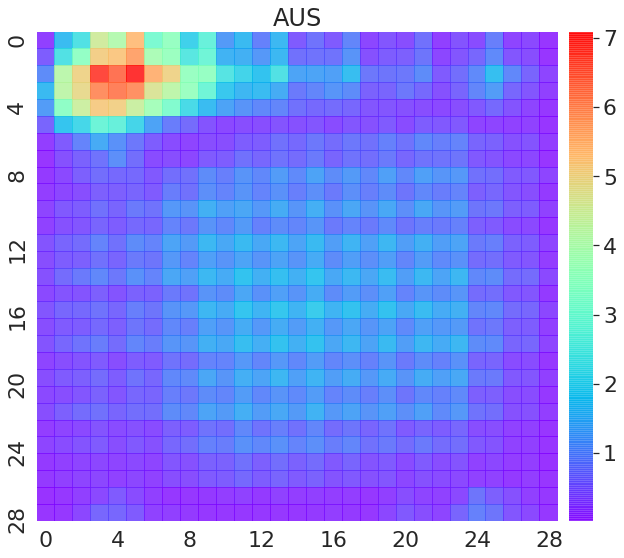

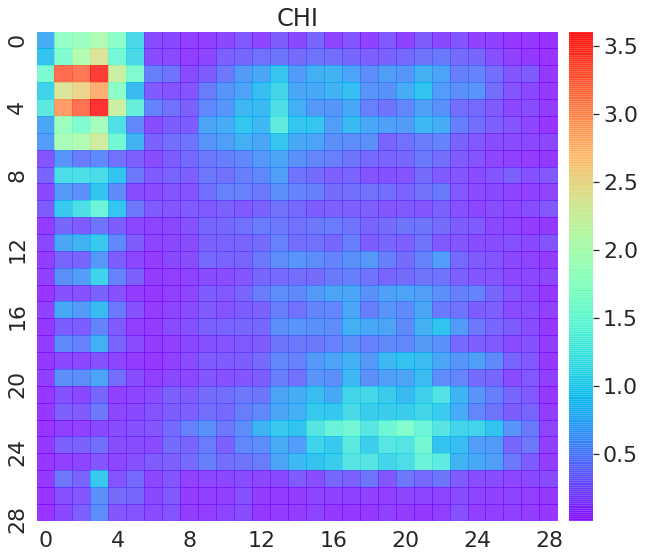

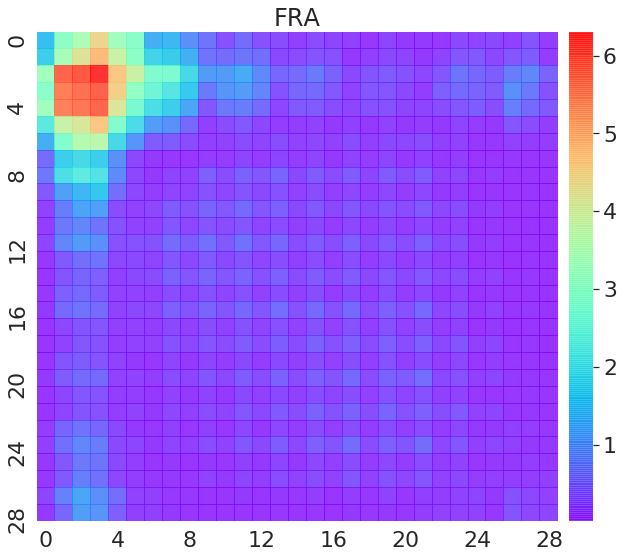

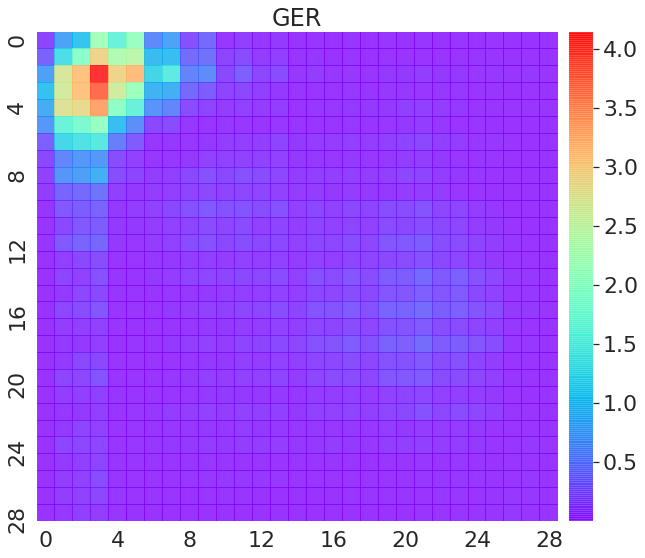

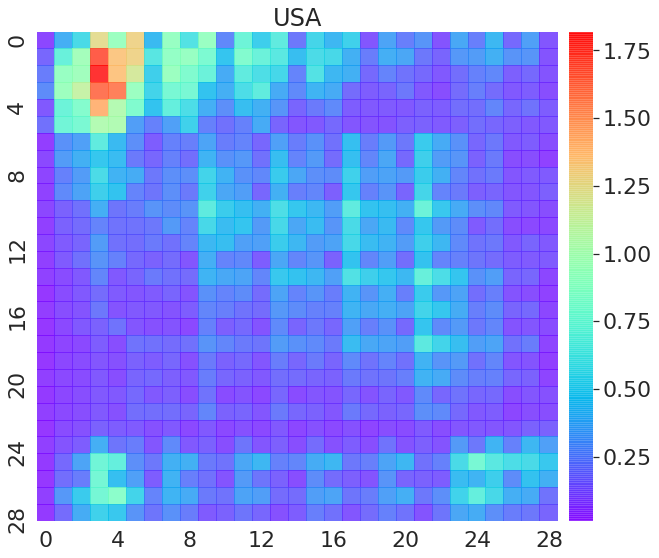

In [9]:
for country in dfi.columns:    
    sns.set(style='white',  font='sans-serif', font_scale=2)
    fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

    IMPM = dfi[country].values.reshape(*mp.fmap_shape)
    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, xticklabels=4, ax =ax,
                yticklabels=4, #vmin = 0.2,
                cbar_kws = {'fraction':0.046, 'pad':0.02})

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.title(country)

    plt.subplots_adjust(wspace = 0.18)

    plt.savefig('./model/%s.svg' % country, dpi = 400, bbox_inches="tight")


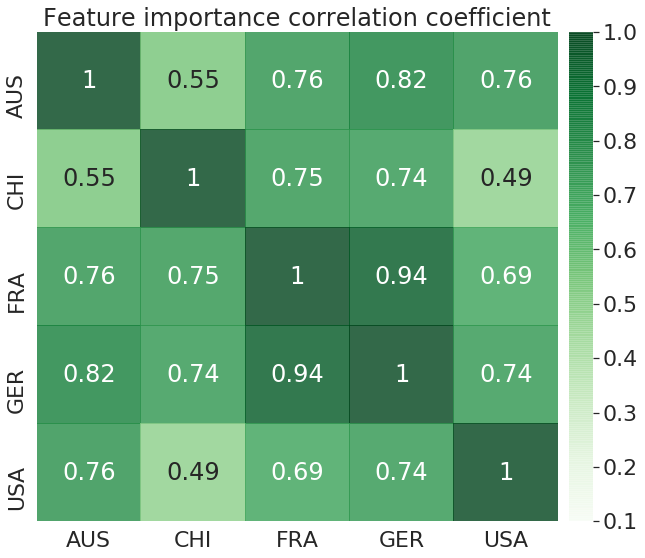

In [10]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

IMPM = dfi.corr()
sns.heatmap(IMPM,  
            yticklabels = IMPM.columns, # xticklabels=4,yticklabels=4,
            xticklabels = IMPM.columns,
            cmap = 'Greens', alpha = 0.8, ax =ax,
            vmin = 0.1, annot = True,
            cbar_kws = {'fraction':0.046, 'pad':0.02})


ax.set_title("Feature importance correlation coefficient")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplots_adjust(wspace = 0.18)
plt.savefig('./model/all.svg', dpi = 400, bbox_inches="tight")

In [42]:
df_save = all_importance['CHI'][['x', 'y', 'v', 'Subtypes', 'colors', ]].join(dfi)

In [43]:
df_save = df_save.set_index('v')

In [44]:
df_save['5_countries_average_importance'] = dfi.mean(axis=1).values

In [45]:
df_save.sort_values('5_countries_average_importance', ascending = False).to_excel('./model/feature_importance.xlsx')

In [48]:
df_save.sort_values('5_countries_average_importance', ascending = False).head(15)[['x', 'y',  'Subtypes', '5_countries_average_importance']]

,x,y,Subtypes,5_countries_average_importance
v,,,,
unknown Dialister [meta_mOTU_v2_5867],3,2,cluster_03,4.528148
Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754],3,3,cluster_03,4.015248
Alloprevotella tannerae [ref_mOTU_v2_4636],3,4,cluster_03,3.865421
Parvimonas sp. [ref_mOTU_v2_5245],2,2,cluster_03,3.640268
Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429],4,2,cluster_02,3.512162
Parvimonas sp. [ref_mOTU_v2_4961],2,3,cluster_03,3.467819
Prevotella oris [ref_mOTU_v2_0520],2,4,cluster_03,3.401658
Fusobacterium nucleatum s. animalis [ref_mOTU_v2_0776],3,1,cluster_03,3.395282
Clostridiales bacterium S5-A14a [meta_mOTU_v2_5486],5,2,cluster_02,3.385131


In [17]:
from scipy.stats import pearsonr

In [18]:
pccs = []
ps = []
for i in dfi.columns:
    for j in dfi.columns:
        pcc, p = pearsonr(dfi[i], dfi[j])
        pccs.append(pcc)
        ps.append(p)

In [24]:
df1 = pd.DataFrame(np.array(pccs).reshape(5,5), columns = dfi.columns, index = dfi.columns)

In [25]:
df2 = pd.DataFrame(np.array(ps).reshape(5,5), columns = dfi.columns, index = dfi.columns)

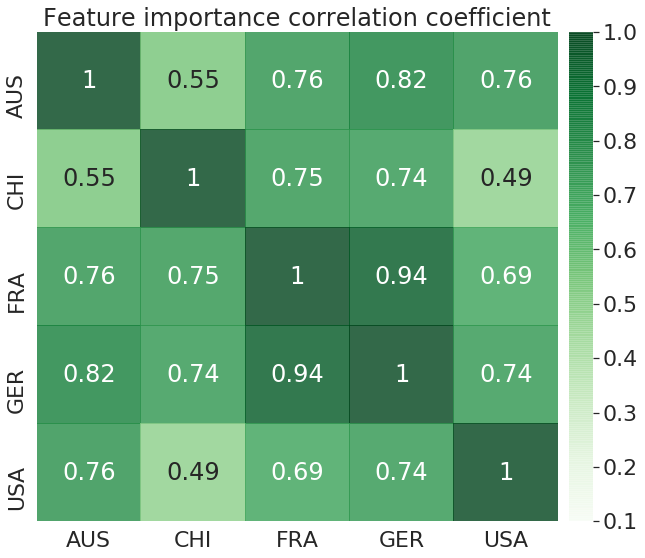

In [34]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))


sns.heatmap(df1,  
            yticklabels = df1.columns, # xticklabels=4,yticklabels=4,
            xticklabels = df1.columns,
            cmap = 'Greens', alpha = 0.8, ax =ax,
            vmin = 0.1, annot = True,
            cbar_kws = {'fraction':0.046, 'pad':0.02})


ax.set_title("Feature importance correlation coefficient")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplots_adjust(wspace = 0.18)
plt.savefig('./model/all.svg', dpi = 400, bbox_inches="tight")